## 作业内容
基本要求：

●使用sklearn 的 MLP 实现神经网络

●数据要求：	

●分类问题：

●随机样本2分类

●选取任意标准数据集测试

提高练习：

●使用pytorch实现梯度下降（先手动update，再使用torch.optim模块）【必修】

●(有独显者)尝试使用 cuda ，对比GPU与CPU的运行效率

●尝试手动实现梯度下降（难）

In [5]:
#数据来源
import kagglehub
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\lenovo\.cache\kagglehub\datasets\johnsmith88\heart-disease-dataset\versions\2


## 代码封装

In [6]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
df1=pd.read_csv(r'./heart.csv')
X=df1.values[:,:-1]
y=df1.values[:,-1].reshape(-1,1)


d:\tools\miniforge\envs\pytorch\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


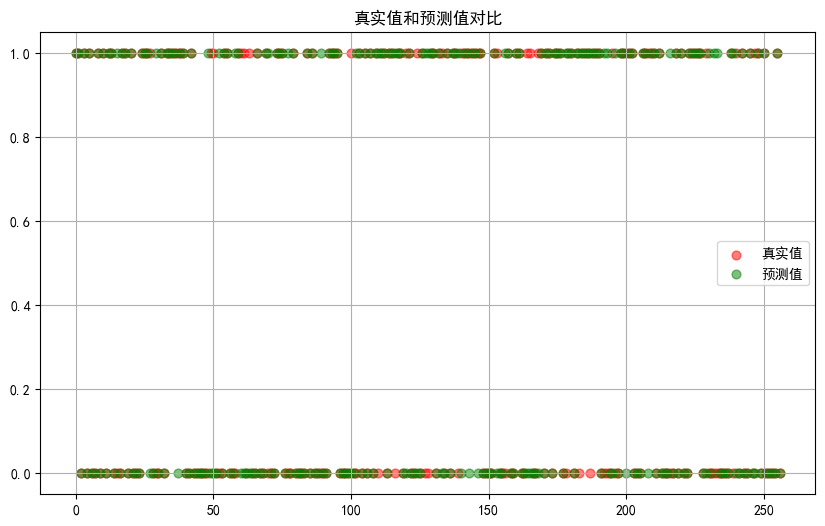

0.19455252918287938
0.19455252918287938


In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
mlp=MLPClassifier(hidden_layer_sizes=5,max_iter=1000,random_state=42,activation='logistic')
mlp.fit(X_train,y_train)
y_pred=mlp.predict(X_test)
loss=((y_test-y_pred.reshape(-1,1))**2).mean()
loss
def loss_plot(y_test,y_pred):
    plt.rcParams['font.sans-serif'] = ['SimHei'] 
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test)),y_test,color="red",label="真实值",alpha=0.5,s=40)
    plt.scatter(range(len(y_pred)),y_pred,color="green",label="预测值",alpha=0.5,s=40)
    plt.title("真实值和预测值对比")
    plt.legend()
    plt.grid()
    plt.show()
loss_plot(y_test,y_pred)
loss
print(mean_squared_error(y_test, y_pred))
print(loss)


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
X_tensor=torch.FloatTensor(X_train)
y_tensor=torch.FloatTensor(y_train)
class first_nn(nn.Module):
     def __init__(self):
        super(first_nn, self).__init__()
        self.hidden1 = nn.Linear(13, 10) 
        self.hidden2=nn.Linear(10,10)  
        self.output = nn.Linear(10, 1)     

     def forward(self, x):
        x = torch.sigmoid(self.hidden1(x))
        x=torch.sigmoid(self.hidden2(x))
        x = self.output(x)
        return x

def auto_Network(X,y,lrs,epochs):#自动更新
    loss_list=[]
    model=first_nn()
    loss_fuction=nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lrs)
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs=model(X)
        loss=loss_fuction(outputs,y)
        loss_list.append(loss.item())
        #if epoch % 100 == 0:
            #print("第{}次训练损失为{}".format(epoch,loss))  
        loss.backward()
        optimizer.step()
    print("最终损失为", loss.item())
    plt.rcParams['font.sans-serif'] = ['SimHei'] 
    plt.figure(figsize=(10, 6))
    plt.title('自动更新的均方误差')
    plt.plot(loss_list)
    plt.xlabel('次数')
    plt.ylabel('均方误差')
    plt.show()



def Network(X,y,learning_rate,epochs):#手动更新
    model = first_nn()
    criterion = nn.MSELoss()
    loss_list=[]
    for epoch in range(epochs):
        model.train()
        outputs = model(X) 
        loss = criterion(outputs, y)
        loss_list.append(loss.item())
        #if epoch % 100 == 0:
            #print("第{}次训练损失为{}".format(epoch,loss))  
        model.zero_grad() 
        loss.backward() 
        with torch.no_grad():  
            for param in model.parameters():
                param -= learning_rate * param.grad 
    print("最终损失为", loss.item())
    plt.rcParams['font.sans-serif'] = ['SimHei'] 
    plt.figure(figsize=(10, 6))
    plt.title('手动更新的均方误差')
    plt.plot(loss_list)
    plt.xlabel('次数')
    plt.ylabel('均方误差')
    plt.show()


## 运行结果

最终损失为 0.22815603017807007


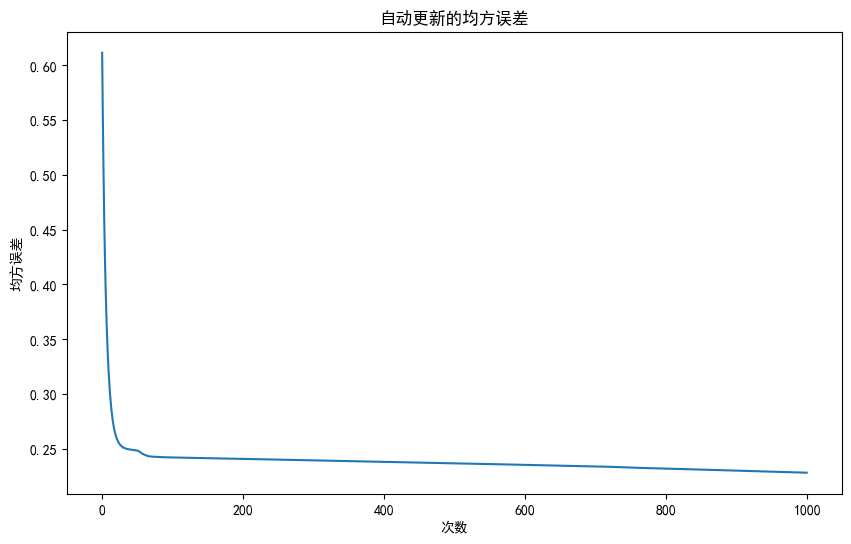

最终损失为 0.24310994148254395


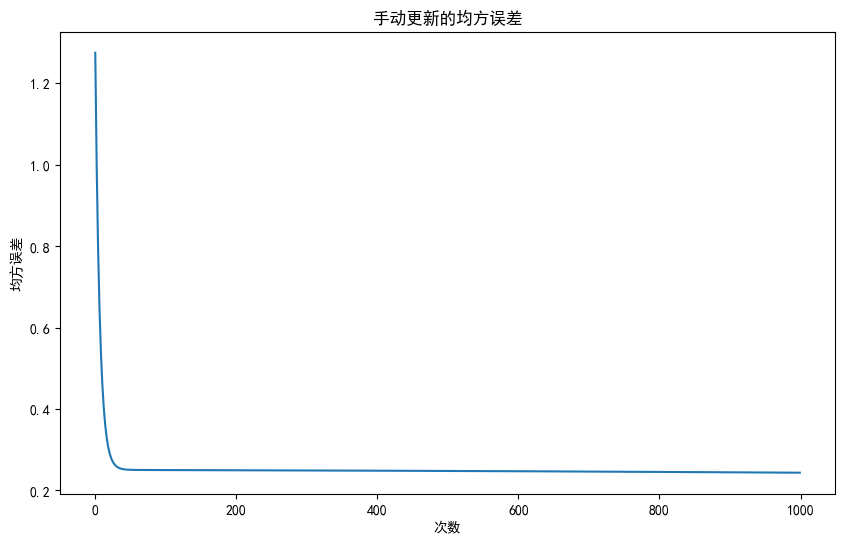

In [9]:
auto_Network(X_tensor,y_tensor,0.01,1000)
Network(X_tensor,y_tensor,0.01,1000)

### 总结

在这个实验中，使用了心脏疾病数据集，利用神经网络进行分类和回归任务。以下是主要步骤和结果的总结：

1. **数据加载和预处理**：
   - 通过 `kagglehub` 下载了心脏疾病数据集，并使用 `pandas` 加载数据。
   - 特征矩阵 `X` 包含所有输入特征，目标变量 `y` 为最后一列。

2. **数据集划分**：
   - 将数据集分为训练集和测试集，测试集占 25%。

3. **使用 `sklearn` 的 MLPClassifier 进行分类**：
   - 创建了一个简单的多层感知器（MLP），设置隐藏层大小为 5，激活函数为 logistic。
   - 模型经过 1000 次迭代后进行训练，并在测试集上进行预测。
   - 计算了预测损失（均方误差），并绘制了真实值和预测值的对比图。

4. **使用 PyTorch 构建神经网络**：
   - 自定义了一个简单的神经网络模型 `first_nn`，包括两个隐藏层和一个输出层。
   - 实现了两种训练方式：自动更新（使用 `optim.SGD`）和手动更新（手动调整参数）。
   - 记录了每个 epoch 的损失值，并绘制了损失曲线。

5. **结果展示**：
   - 在自动和手动训练过程中，最终的损失值都被计算并展示。
   - 随着训练次数的增加，均方误差逐渐减小，显示出模型的学习效果。

### 结论

通过这次实验，成功地实现了使用 MLP 进行心脏疾病分类的神经网络模型，并通过 PyTorch 深入探索了神经网络的构建和训练过程。之后可以考虑优化模型结构、调整超参数以及使用更多数据增强技术来提升模型的表现。

In [ ]:
def print():
    if self.left:
        self.left.print()
    print(self.value)
    if self.right:
        self.right.print()

In [2]:
import numpy as np
a=np.array([1,2,3,4])
b=np.array([2,4,5,6])
a@b

np.int64(49)

In [ ]:
import numpy as np
matrix=np.array([[2,1,0],[1,2,1],[0,1,2]])
np.linalg.eig(matrix)

EigResult(eigenvalues=array([3.41421356, 2.        , 0.58578644]), eigenvectors=array([[-5.00000000e-01,  7.07106781e-01,  5.00000000e-01],
       [-7.07106781e-01,  4.05405432e-16, -7.07106781e-01],
       [-5.00000000e-01, -7.07106781e-01,  5.00000000e-01]]))

: 